In [1]:
%matplotlib inline

# CSS File
from IPython.core.display import HTML
from IPython.display import Image
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
# Libraries
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime
from matplotlib.dates import DayLocator, HourLocator, MinuteLocator, AutoDateLocator, DateFormatter

sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")
sns.set_style("darkgrid")

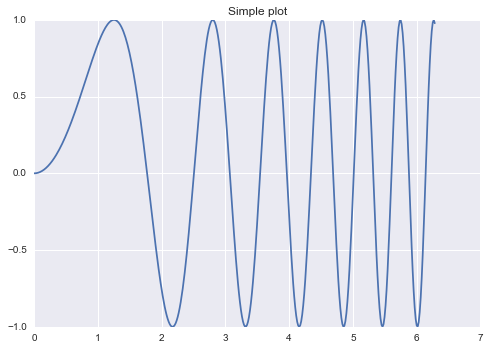

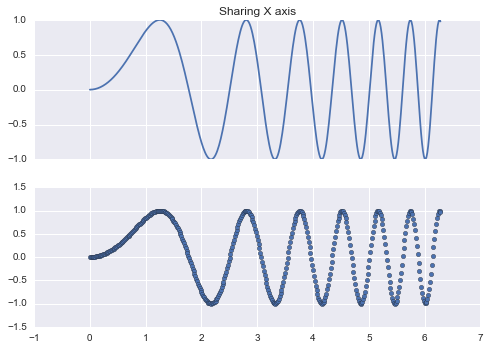

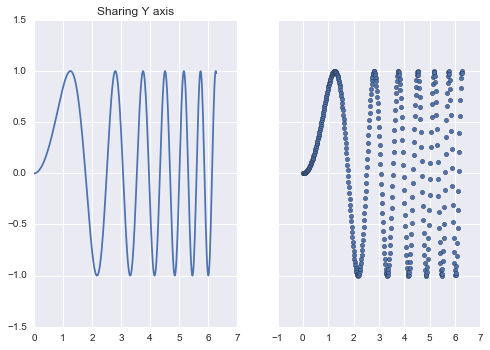

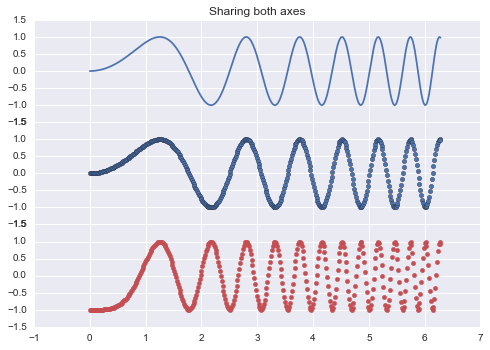

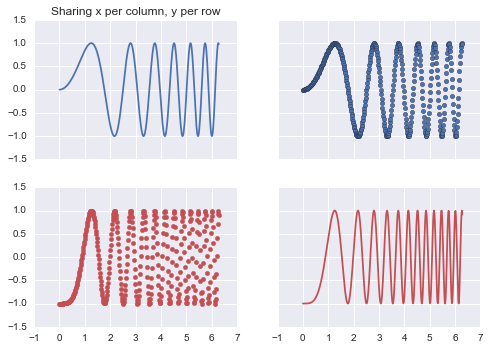

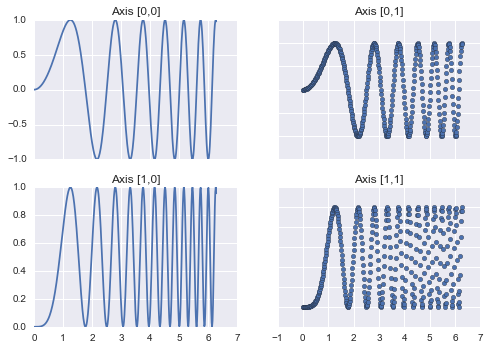

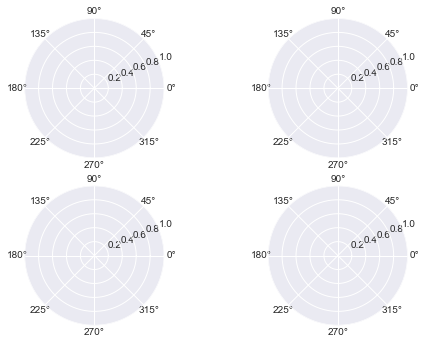

In [3]:
"""Examples illustrating the use of plt.subplots().

This function creates a figure and a grid of subplots with a single call, while
providing reasonable control over how the individual plots are created.  For
very refined tuning of subplot creation, you can still use add_subplot()
directly on a new figure.
"""

import matplotlib.pyplot as plt
import numpy as np

# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')

# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')

# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)

# Four polar axes
plt.subplots(2, 2, subplot_kw=dict(projection='polar'))

plt.show()

In [5]:
def describe_metric(metric_name, df):
    '''
        Generate custom summary of the data
    '''
    summary = df.describe(percentiles=[0.05,0.25,0.5,0.75,0.95])
    summary.columns = [metric_name]
    summary = summary.applymap('{:.2f}'.format) # URL: https://pyformat.info/
    #summary['value'] = summary['value'].map('{:.2f}'.format) 
    summary.drop(labels=['count'], axis=0, inplace=True)
    summary.loc['most_common'] = df.mode().value[0]
    summary.loc['skewness'] = df.value.skew()
    summary.loc['kurtosis'] = "{0:.2f}".format(round(df.value.kurtosis(), 2))
    summary = summary.rename(index={'mean':'average', 'std':'std dev', 'min':'lowest', 'max':'highest'})
    return summary

def read_metric_data(metric_name, csv_name):
    '''
        Read metric data from a given csv file.
        CSV format: [server_name, timestamp, value]
        Timestamp format: YYYY-MM-DD HH:mm:SS
        Lines begining with # are ignored as comments.
    '''
    
    # Read from csv file.
    df = pd.read_csv(csv_name, index_col=1, parse_dates=True, names=[ 'server', 'value'], comment='#', quotechar="'", sep=",")
    if(df.isnull().value.any()): 
        #print ("{0} - missing data row count#: {1}".format(csv_name, np.count_nonzero(df1.isnull().values)))
        df = df.fillna(method='ffill', limit=2) # Fill last value upto two consequtive slots
        
    print("{0} - #Observations: {1}".format(csv_name, df.shape))
    return df

data/du-5d.txt - #Observations: (120, 2)
data/wbs_5d.txt - #Observations: (120, 2)
data/rbs_5d.txt - #Observations: (120, 2)


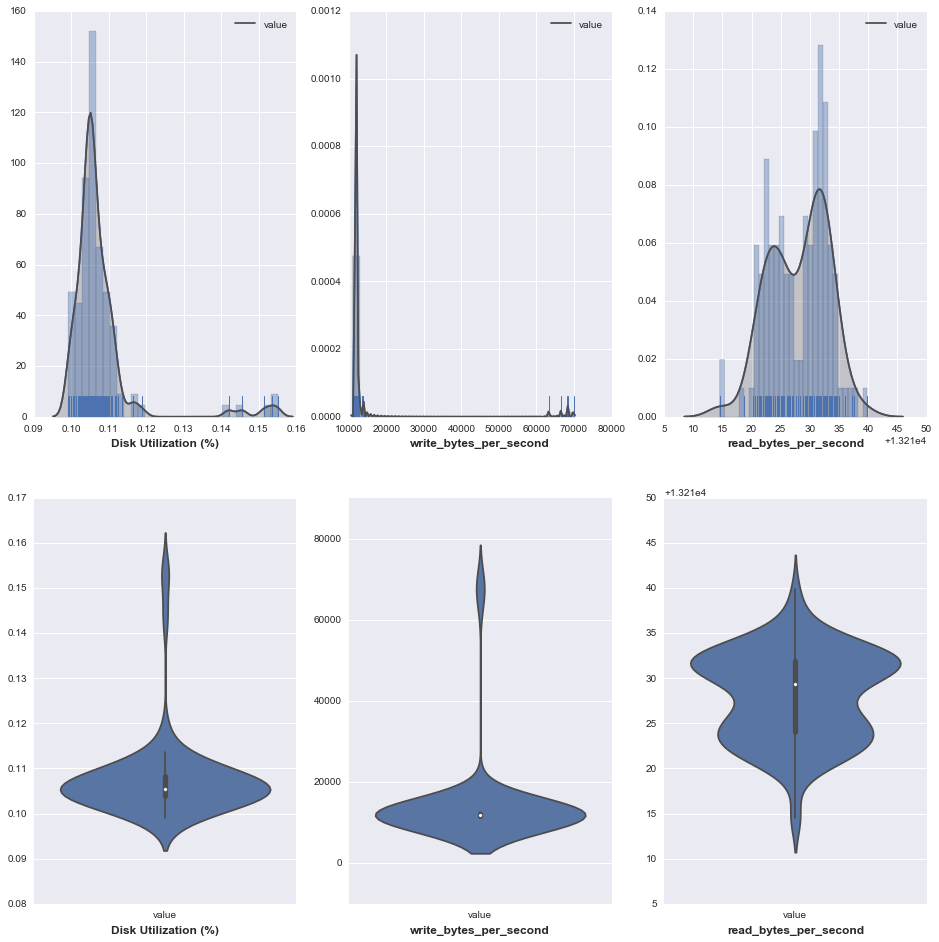

In [6]:


metric_names = ["Disk Utilization (%)", "write_bytes_per_second", "read_bytes_per_second"]
csv_names = ['data/du-5d.txt', 'data/wbs_5d.txt', 'data/rbs_5d.txt']

df1 = read_metric_data(metric_names[0], csv_names[0])
df2 = read_metric_data(metric_names[1], csv_names[1])
df3 = read_metric_data(metric_names[2], csv_names[2])

#Distribution Plot
fig, axr = plt.subplots(nrows=2, ncols=3, figsize=(16,16))
g1 = sns.distplot(df1.value, bins=30, kde=True, rug=True, ax=axr[0,0]);
sns.kdeplot(df1.value, shade=True, color=".3", ax=axr[0,0]);
g1.set_xlabel(metric_names[0], fontweight='bold', fontsize=12)

g2= sns.distplot(df2.value, bins=30, kde=True, rug=True, ax=axr[0,1]);
sns.kdeplot(df2.value, shade=True, color=".3", ax=axr[0,1]);
g2.set_xlabel(metric_names[1], fontweight='bold', fontsize=12)

g3 = sns.distplot(df3.value, bins=30, kde=True, rug=True, ax=axr[0,2]);
sns.kdeplot(df3.value, shade=True, color=".3", ax=axr[0,2]);
g3.set_xlabel(metric_names[2], fontweight='bold', fontsize=12)
    
g1 = sns.violinplot(data=df1, ax=axr[1,0])
g1.set_xlabel(metric_names[0], fontweight='bold', fontsize=12)

g2 = sns.violinplot(data=df2, ax=axr[1,1])
g2.set_xlabel(metric_names[1], fontweight='bold', fontsize=12)

g3=sns.violinplot(data=df3, ax=axr[1,2])
g3.set_xlabel(metric_names[2], fontweight='bold', fontsize=12)

In [7]:
sum1 = describe_metric(metric_names[0], df1)
sum2 = describe_metric(metric_names[1], df2)
sum3 = describe_metric(metric_names[2], df3)

composite = pd.concat([sum1, sum2, sum3], axis=1, join_axes=[sum1.index])
composite

,Disk Utilization (%),write_bytes_per_second,read_bytes_per_second
average,0.11,14203.29,13238.09
std dev,0.01,11133.96,4.97
lowest,0.10,10980.23,13224.53
5%,0.10,11223.05,13230.88
25%,0.10,11706.08,13233.99
50%,0.11,11877.03,13239.37
75%,0.11,12103.23,13241.96
95%,0.12,13569.66,13244.55
highest,0.16,69872.48,13249.87
most_common,0.10525,12462.4,13224.5
